In [1]:
import os
from os.path import isdir, join
from pathlib import Path
import pandas as pd

# Math
import numpy as np
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
import librosa

from sklearn.decomposition import PCA

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import IPython.display as ipd
import librosa.display

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import pandas as pd

%matplotlib inline

<ipython-input-95-64732f3a476f>:10: RuntimeWarning:

divide by zero encountered in log10

<ipython-input-95-64732f3a476f>:10: MatplotlibDeprecationWarning:

shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.



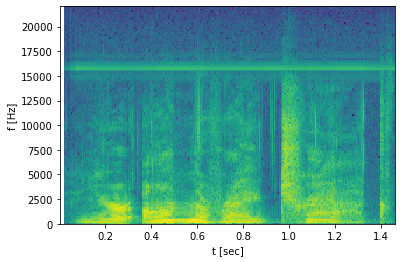

In [95]:
from scipy.io import wavfile
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

sample_rate, samples = wavfile.read(path1)
sig = np.mean(samples, axis=1)
f, t, Sxx = signal.spectrogram(sig, sample_rate, scaling='spectrum')

plt.pcolormesh(t, f, np.log10(Sxx))
plt.ylabel('f [Hz]')
plt.xlabel('t [sec]')
plt.show()

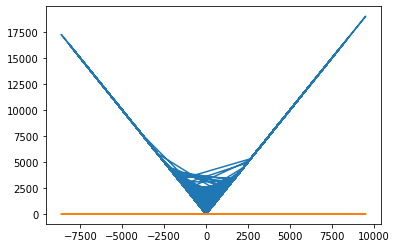

In [99]:
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
from scipy.fftpack import fft
import numpy as np
import matplotlib as mpl

rate, data = wav.read(path1)
fft_out = fft(data)
%matplotlib inline
plt.plot(data, np.abs(fft_out))
plt.show()

In [100]:
import numpy as np
from scipy import signal
from scipy.fft import fftshift
from matplotlib import mlab
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

In [71]:
path = '/Users/ajayk/Desktop/blah-blah-blah.wav'

Frequency sampling 44100
Channels 2
Complete Samplings N 64745
secs 1.468140589569161
Timestep between samples Ts 2.2675736961451248e-05


<ipython-input-101-62d90588f2f0>:24: DeprecationWarning:

scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead



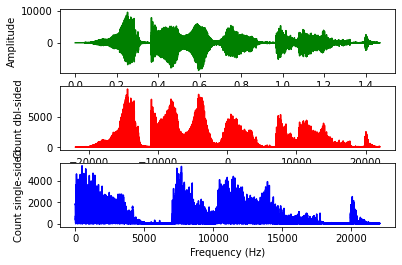

In [101]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

from __future__ import print_function
import scipy.io.wavfile as wavfile
import scipy
from scipy.fft import fftshift 
import scipy.fftpack
import numpy as np
from matplotlib import pyplot as plt

fs_rate, signal = wavfile.read(path1)
print ("Frequency sampling", fs_rate)
l_audio = len(signal.shape)
print ("Channels", l_audio)
if l_audio == 2:
    signal = signal.sum(axis=1) / 2
N = signal.shape[0]
print ("Complete Samplings N", N)
secs = N / float(fs_rate)
print ("secs", secs)
Ts = 1.0/fs_rate # sampling interval in time
print ("Timestep between samples Ts", Ts)
t = scipy.arange(0, secs, Ts) # time vector as scipy arange field / numpy.ndarray
FFT = abs(fftshift(signal))
FFT_side = FFT[range(int(N/2))] # one side FFT range
freqs = scipy.fftpack.fftfreq(signal.size, t[1]-t[0])
fft_freqs = np.array(freqs)
freqs_side = freqs[range(int(N/2))] # one side frequency range
fft_freqs_side = np.array(freqs_side)
plt.subplot(311)
p1 = plt.plot(t, signal, "g") # plotting the signal
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(312)
p2 = plt.plot(freqs, FFT, "r") # plotting the complete fft spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count dbl-sided')
plt.subplot(313)
p3 = plt.plot(freqs_side, abs(FFT_side), "b") # plotting the positive fft spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count single-sided')
plt.show()

[]

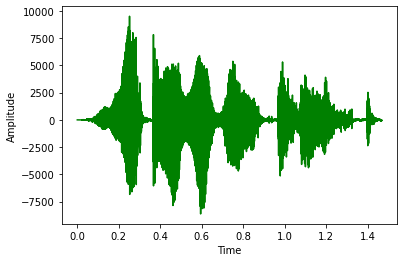

In [102]:
p1 = plt.plot(t, signal, "g") # plotting the signal
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot()

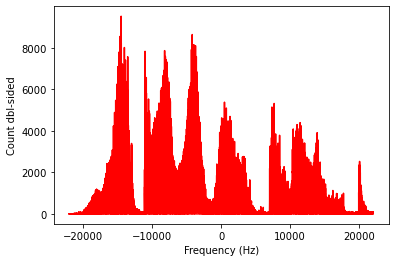

In [103]:
p2 = plt.plot(freqs, FFT, "r") # plotting the complete fft spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count dbl-sided')
plt.show()

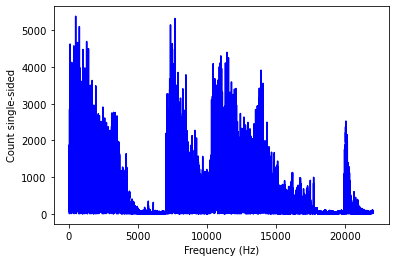

In [104]:
p3 = plt.plot(freqs_side, abs(FFT_side), "b") # plotting the positive fft spectrum
plt.xlabel('Frequency (Hz)')
plt.ylabel('Count single-sided')
plt.show()

In [83]:
path1 = '/Users/ajayk/Desktop/youre-on-the-right-track.wav'

In [84]:
from scipy.io import wavfile
freq_sample, sig_audio = wavfile.read(path1)


In [85]:
print('\nShape of Signal:', sig_audio.shape)
print('Signal Datatype:', sig_audio.dtype)
print('Signal duration:', round(sig_audio.shape[0] / float(freq_sample), 2), 'seconds')


Shape of Signal: (64745, 2)
Signal Datatype: int16
Signal duration: 1.47 seconds


In [105]:
pow_audio_signal = sig_audio / np.power(2,15)
pow_audio_signal = pow_audio_signal [:100]
time_axis = 1000 * np.arange(0, len(pow_audio_signal), 1) / float(freq_sample)
#plt.plot(time_axis, pow_audio_signal, color='blue')

<ipython-input-88-3510e1d710ce>:17: RuntimeWarning:

divide by zero encountered in log10



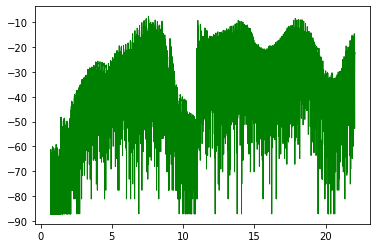

In [88]:
# Working on the same input file
# Extracting the length and the half-length of the signal to input to the foruier transform
sig_length = len(sig_audio)
half_length = np.ceil((sig_length + 1) / 2.0).astype(np.int)
# We will now be using the Fourier Transform to form the frequency domain of the signal
signal_freq = np.fft.fft(sig_audio)
# Normalize the frequency domain and square it
signal_freq = abs(signal_freq[0:half_length]) / sig_length
signal_freq **= 2
transform_len = len(signal_freq)
# The Fourier transformed signal now needs to be adjusted for both even and odd cases
if sig_length % 2:
   signal_freq[1:transform_len] *= 2
else:
   signal_freq[1:transform_len-1] *= 2
# Extract the signal's strength in decibels (dB)
exp_signal = 10 * np.log10(signal_freq)
x_axis = np.arange(0, half_length, 1) * (freq_sample / sig_length) / 1000.0
plt.plot(x_axis, exp_signal, color='green', linewidth=1)


MFCC Parameters
Window Count = 67
Individual Feature Length = 13


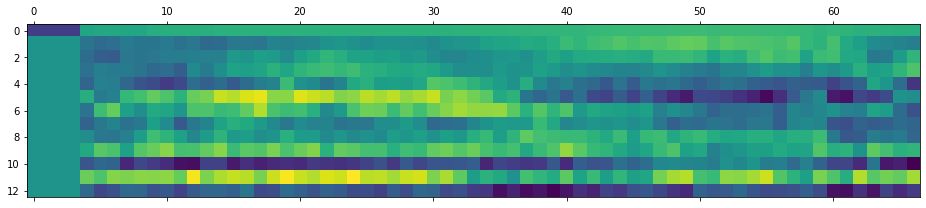

In [93]:
# Installing and importing necessary libraries

from python_speech_features import mfcc, logfbank
sampling_freq, sig_audio = wavfile.read(path1)
# We will now be taking the first 15000 samples from the signal for analysis
sig_audio = sig_audio[:15000]
# Using MFCC to extract features from the signal
mfcc_feat = mfcc(sig_audio, sampling_freq)
print('\nMFCC Parameters\nWindow Count =', mfcc_feat.shape[0])
print('Individual Feature Length =', mfcc_feat.shape[1])

mfcc_feat = mfcc_feat.T
plt.matshow(mfcc_feat)


Filter bank
Window Count = 67
Individual Feature Length = 26


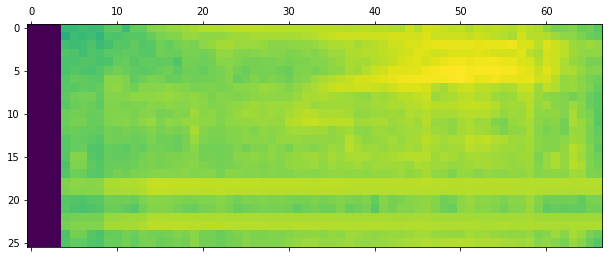

In [94]:
# Generating filter bank features
fb_feat = logfbank(sig_audio, sampling_freq)
print('\nFilter bank\nWindow Count =', fb_feat.shape[0])
print('Individual Feature Length =', fb_feat.shape[1])

fb_feat = fb_feat.T
plt.matshow(fb_feat)